Business Case
- Assuming you are working in a bank and a customer (Corporate/Company) is requesting for loan.
- You need to predict if the customer will default the loan base on the probability of bankruptcy.
- You are to create the predictive model using machine learning model.
- Part I
- Please use the necessary attributes.
- Remember to split train test.
- Split before normalize and oversample the minority.
- All machine learning use default setting.
- Measurement is accuracy.
- Data visualization is needed. At least use one from pandas, seaborn and matplotlib.
- Machine learning model should include regression, decision tree and neural network.
- You are required to plot ROC, precision_recall_curve
- How to improve the results by change the features selected, data wrangling or parameter setting, Including using keras and tensorflow.
- Explain the pros and cons about your model, including limitation (can be both quantitative and qualitative).
- How to overcome the weakness of your model (future study).
- The important of your model to the bank.
- Apply orange on all the models.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv("/content/drive/MyDrive/Data/bankruptcy.csv")

In [126]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [127]:
x = df.drop(columns="class")
y = df["class"]
from sklearn.feature_selection import SelectKBest, f_regression
f = SelectKBest(score_func = f_regression, k=10).fit(x,y).get_support()
x.columns[f]

Index(['Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51'],
      dtype='object')

In [128]:
df = df.loc[:, ["class", 'Attr3', 'Attr8', 'Attr11', 'Attr16', 'Attr17', 'Attr22', 'Attr26',
       'Attr35', 'Attr50', 'Attr51']]

In [129]:
df.head()

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
0,0,-0.040269,0.641242,-0.214423,-0.242796,0.579994,-0.403174,-0.206675,-0.435600,-0.192331,-1.027090
1,0,0.304381,0.074710,-0.835505,-0.603332,0.040666,-0.873423,-0.591456,-0.986256,0.186782,-0.079059
2,0,-0.488404,-0.456287,0.156944,-0.367159,-0.464823,0.152437,-0.339401,0.766162,-0.468628,0.393587
3,0,-0.181684,-0.462971,-0.314756,-0.454498,-0.413685,-0.089462,-0.442992,-0.100314,-0.515188,-0.267896
4,0,0.678337,0.097183,0.918860,0.744187,0.062059,0.866831,0.675202,1.004640,0.342874,-0.210252


In [130]:
df.isnull().any()

class     False
Attr3     False
Attr8     False
Attr11    False
Attr16    False
Attr17    False
Attr22    False
Attr26    False
Attr35    False
Attr50    False
Attr51    False
dtype: bool

In [131]:
df.describe()

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.020300,-0.003544,0.009053,-0.002092,0.004570,0.008561,-0.004581,0.004990,-0.004104,0.000980,-0.001850
std,0.141032,1.015494,1.064426,1.221631,0.993429,1.057773,1.238670,0.984670,1.164521,0.990897,1.051308
min,0.000000,-25.597146,-0.966015,-97.172752,-7.243222,-1.010521,-100.671151,-7.834373,-81.571260,-0.991489,-1.560279
25%,0.000000,-0.516971,-0.445667,-0.305785,-0.425618,-0.445706,-0.334718,-0.409379,-0.362912,-0.479160,-0.671175
50%,0.000000,0.003186,-0.260150,-0.051330,-0.244403,-0.260870,-0.070187,-0.232934,-0.080775,-0.230765,-0.144492
75%,0.000000,0.585722,0.098874,0.316930,0.117491,0.095591,0.298283,0.108514,0.337973,0.139985,0.492830
max,1.000000,3.324327,47.504463,11.367801,30.016115,45.284425,9.778090,26.317555,11.908359,24.149898,46.280276


<Axes: >

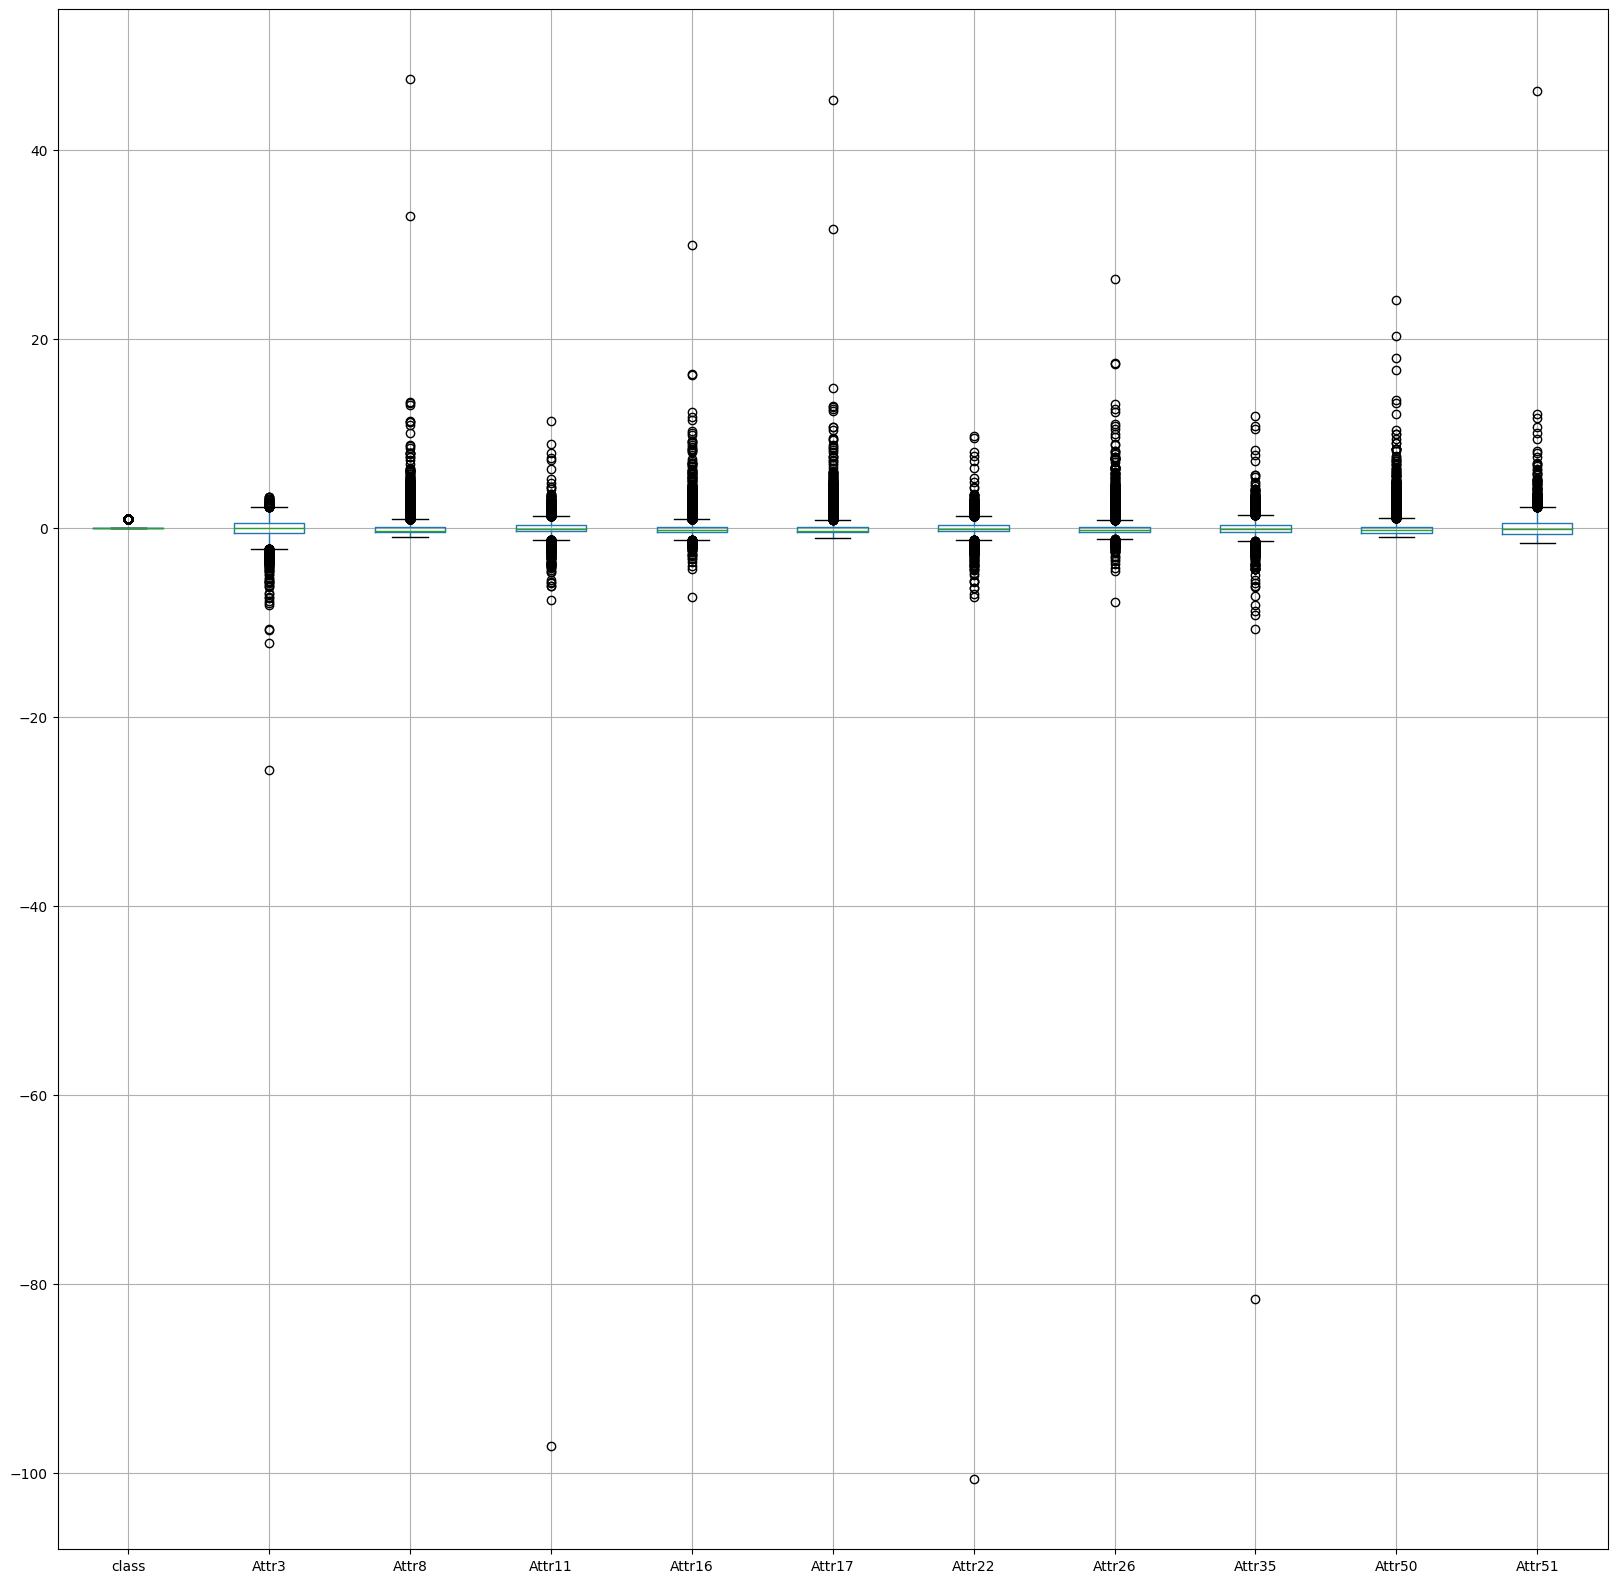

In [132]:
df.boxplot(figsize=(20,20))

array([[<Axes: title={'center': 'class'}>,
        <Axes: title={'center': 'Attr3'}>,
        <Axes: title={'center': 'Attr8'}>],
       [<Axes: title={'center': 'Attr11'}>,
        <Axes: title={'center': 'Attr16'}>,
        <Axes: title={'center': 'Attr17'}>],
       [<Axes: title={'center': 'Attr22'}>,
        <Axes: title={'center': 'Attr26'}>,
        <Axes: title={'center': 'Attr35'}>],
       [<Axes: title={'center': 'Attr50'}>,
        <Axes: title={'center': 'Attr51'}>, <Axes: >]], dtype=object)

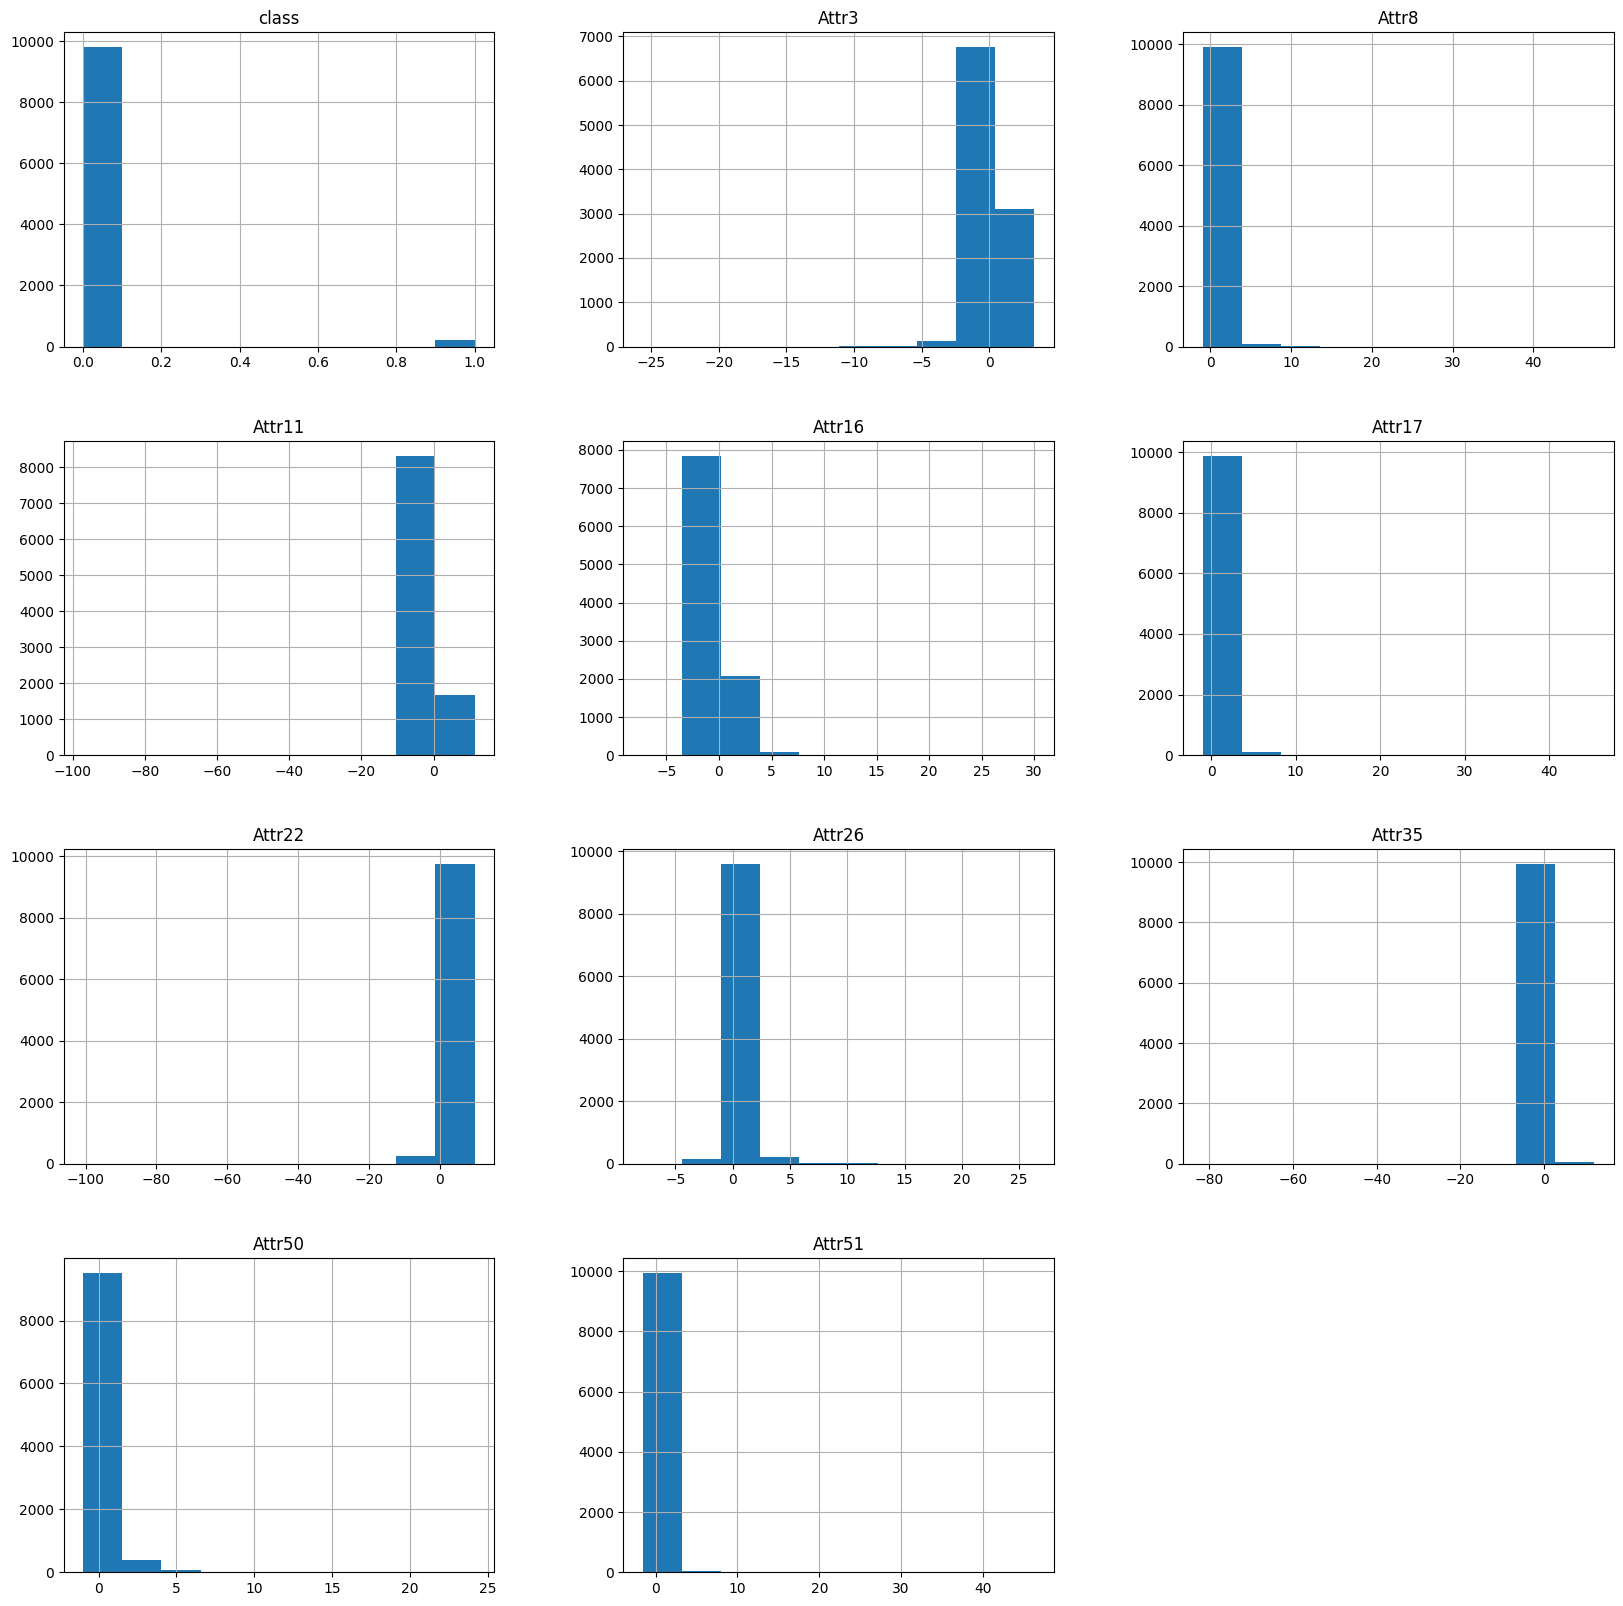

In [133]:
df.hist(figsize=(20,20))

<Axes: >

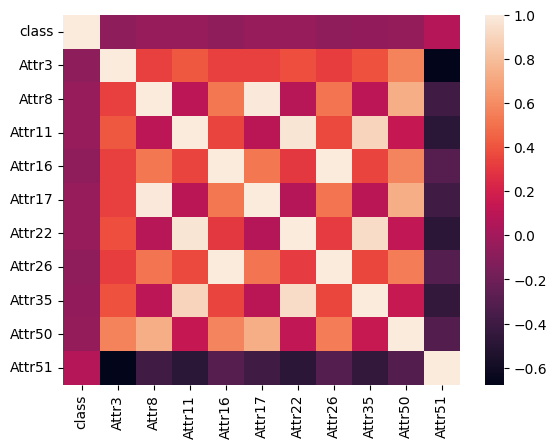

In [134]:
sns.heatmap(df.corr())

In [135]:
X = df.drop(columns="class")
Y = df['class']

In [136]:
from sklearn.model_selection import train_test_split
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn import linear_model
from sklearn import tree
from sklearn import neural_network
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [137]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [138]:
Y.value_counts()

0    9797
1     203
Name: class, dtype: int64

In [94]:
for each in x.columns[f]:
  X_train[each] = stats.zscore(X_train[each])
  X_test[each] = stats.zscore(X_test[each])

In [95]:
# Oversample the train set
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [96]:
log_model = linear_model.LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)
cm = confusion_matrix(Y_test, log_pred)
print("Logistic Regression accuracy is: ", (cm[0,0] + cm[1,1]) / sum(sum(cm)))

Logistic Regression accuracy is:  0.6772


In [97]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train, Y_train)
tree_pred = tree_model.predict(X_test)
cm = confusion_matrix(Y_test, tree_pred)
print("Decision Tree Accuracy is: ", (cm[0,0] + cm[1,1]) / sum(sum(cm)))

Decision Tree Accuracy is:  0.9136


In [98]:
neural_model = neural_network.MLPClassifier()
neural_model.fit(X_train, Y_train)
nn_pred = neural_model.predict(X_test)
cm = confusion_matrix(Y_test,nn_pred)
print("neural network accuracy is", (cm[0,0]+cm[1,1])/sum(sum(cm)))

neural network accuracy is 0.802


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


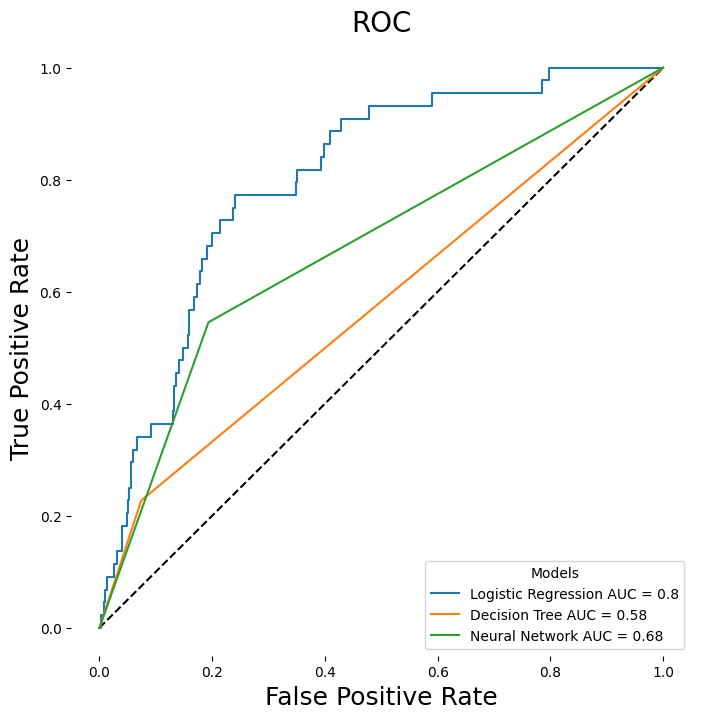

In [99]:
from sklearn.metrics import roc_curve
from sklearn import metrics

log_pred_proba = log_model.predict_proba(X_test)[:,1] 
fpr1, tpr1, _ = metrics.roc_curve(Y_test,  log_pred_proba)
auc1 = metrics.roc_auc_score(Y_test, log_pred_proba)

tree_pred_prob = tree_model.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(Y_test,  tree_pred_prob)
auc2 = metrics.roc_auc_score(Y_test, tree_pred_prob)

nn_pred_prob = neural_model.predict(X_test)
fpr5, tpr5, _ = metrics.roc_curve(Y_test,  nn_pred_prob)
auc5 = metrics.roc_auc_score(Y_test, nn_pred_prob)

plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="Logistic Regression AUC = " + str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="Decision Tree AUC = " + str(round(auc2,2)))
plt.plot(fpr5,tpr5,label="Neural Network AUC = " + str(round(auc5,2)))
plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate',size=18)
plt.ylabel('True Positive Rate',size=18)
plt.title('ROC',size=20)
plt.box(False)

### **How to improve the results through programming by changing the features selected, data wrangling or parameter setting**

To enhance the models, it is advisable to identify and eliminate outliers within the data set. This is because outliers have the potential to skew analysis results and reduce the statistical significance of the data. While removing outliers is a commonly used method, care must be taken as incorrect removal can lead to an underestimation of the variance within the data.

Furthermore, the models can also be improved by optimizing hyperparameters through techniques such as bruteforcing or random sampling. The GridSearchCV method in sklearn enables us to explore the best parameter values from a set of predefined grid parameters. On the other hand, the RandomizedSearchCV from sklearn provides the capability to conduct a random search of hyperparameter combinations for a given classifier.

Keras and TensorFlow allow for the development of deep learning models, which can capture complex relationships and patterns in the data that may be missed by simpler models. Deep learning models such as Long Short-Term Memory (LSTM) networks or Convolutional Neural Networks (CNN) can be used to model time-series data and make accurate predictions.

Secondly, Keras and TensorFlow provide tools for hyperparameter tuning, which can help optimize the model's performance. Hyperparameter tuning involves finding the optimal values of the model's parameters, such as the learning rate, number of hidden layers, and number of nodes in each layer. By optimizing these parameters, the model's accuracy can be improved.

Thirdly, Keras and TensorFlow provide tools for regularization, which can prevent overfitting of the model to the training data. Regularization techniques such as L1 and L2 regularization, dropout, and early stopping can be used to prevent the model from memorizing the training data and instead learn the underlying patterns in the data.

Lastly, Keras and TensorFlow allow for the use of transfer learning, which can improve the accuracy of the model by leveraging pre-trained models. Transfer learning involves using a pre-trained model as a starting point for a new model, and fine-tuning the model on the specific task at hand. This can help improve the model's accuracy and reduce the amount of training data required.

In [100]:
def IQR_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q3 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df1 = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
    return df1


for each in x.columns[f]:
  df1 = IQR_outlier(each)

In [101]:
df1

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
0,0,-0.040269,0.641242,-0.214423,-0.242796,0.579994,-0.403174,-0.206675,-0.435600,-0.192331,-1.027090
1,0,0.304381,0.074710,-0.835505,-0.603332,0.040666,-0.873423,-0.591456,-0.986256,0.186782,-0.079059
2,0,-0.488404,-0.456287,0.156944,-0.367159,-0.464823,0.152437,-0.339401,0.766162,-0.468628,0.393587
3,0,-0.181684,-0.462971,-0.314756,-0.454498,-0.413685,-0.089462,-0.442992,-0.100314,-0.515188,-0.267896
4,0,0.678337,0.097183,0.918860,0.744187,0.062059,0.866831,0.675202,1.004640,0.342874,-0.210252
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,-0.492082,-0.374739,-0.370083,-0.482695,-0.385492,-0.270130,-0.462706,-0.299502,-0.393569,0.398330
9996,0,0.184167,0.689695,-0.390615,0.270885,0.660796,-0.390325,0.361651,-0.432018,0.129862,-0.904155
9997,0,-0.830634,-0.471830,-0.993696,-0.717923,-0.456194,-0.160235,-0.655042,-0.178342,-0.513553,0.549923
9998,0,0.102420,-0.355796,-0.242626,-0.410858,-0.369189,-0.251173,-0.386039,-0.278292,-0.529284,-0.729872


In [102]:
X = df1.drop(columns="class")
Y = df1['class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [103]:
for each in x.columns[f]:
  X_train[each] = stats.zscore(X_train[each])
  X_test[each] = stats.zscore(X_test[each])

In [104]:
X_train, Y_train = SMOTE().fit_resample(X_train, Y_train)

In [105]:
log_model = linear_model.LogisticRegression(max_iter=1000)
log_model.fit(X_train, Y_train)
log_pred = log_model.predict(X_test)
cm = confusion_matrix(Y_test, log_pred)
print("Logistic Regression accuracy is: ", round((cm[0,0] + cm[1,1]) / sum(sum(cm)), 3))

Logistic Regression accuracy is:  0.697


In [106]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [107]:
model = Sequential()

In [108]:
model.add(Dense (20, input_dim=len(X_train.columns),activation="relu"))
model.add(Dropout(0.1))

In [109]:
model.add(Dense (20, input_dim=len(X_train.columns),activation="relu"))
model.add(Dropout(0.1))

In [110]:
model.add(Dense(1, input_dim=len(X_train.columns), activation="sigmoid"))

In [111]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                220       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [112]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [113]:
h= model. fit (X_train, Y_train, batch_size=10, epochs=200)

Epoch 1/200
1390/1390 [==============================] - 6s 3ms/step - loss: 0.5495 - accuracy: 0.7196
Epoch 2/200
1390/1390 [==============================] - 4s 3ms/step - loss: 0.4674 - accuracy: 0.7919
Epoch 3/200
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4421 - accuracy: 0.8122
Epoch 4/200
1390/1390 [==============================] - 4s 3ms/step - loss: 0.4215 - accuracy: 0.8242
Epoch 5/200
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4033 - accuracy: 0.8334
Epoch 6/200
1390/1390 [==============================] - 6s 4ms/step - loss: 0.3860 - accuracy: 0.8399
Epoch 7/200
1390/1390 [==============================] - 4s 3ms/step - loss: 0.3771 - accuracy: 0.8448
Epoch 8/200
1390/1390 [==============================] - 3s 2ms/step - loss: 0.3688 - accuracy: 0.8469
Epoch 9/200
1390/1390 [==============================] - 8s 6ms/step - loss: 0.3608 - accuracy: 0.8511
Epoch 10/200
1390/1390 [==============================] - 6s 4ms/step - l

Text(0.5, 1.0, 'Accuracy')

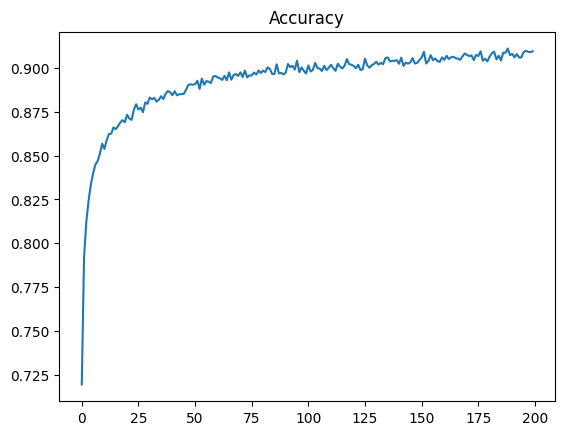

In [114]:
plt.plot(h.history["accuracy"])
plt.title("Accuracy")

Text(0.5, 1.0, 'Loss')

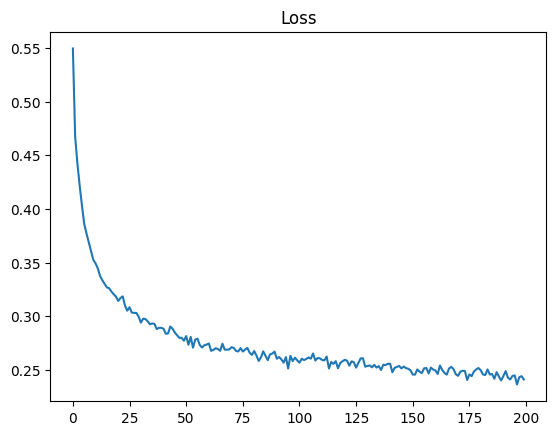

In [115]:
plt.plot(h.history["loss"])
plt.title("Loss")

In [116]:
pred = model.predict(X_test)
pred = np.where(pred >= 0.5, 1, 0 )
cm = confusion_matrix(Y_test, pred)
print("Neural Network Accuracy is: ", round((cm[0,0] + cm[1,1]) / sum(sum(cm)), 3))

75/75 [==============================] - 0s 1ms/step
Neural Network Accuracy is:  0.841


In [117]:
model.evaluate(X_test, Y_test)

75/75 [==============================] - 0s 2ms/step - loss: 0.3391 - accuracy: 0.8409


[0.3391225337982178, 0.8409282565116882]

Q: explain the pros and cons about all the models you use

A:

Logistic regression is a straightforward machine learning algorithm with low computational requirements that is easy to scale. Although not as interpretable as linear regression, it can help identify which input variable has the greatest impact on predicted values. However, logistic regression can overfit data, especially in high-dimensional settings, resulting in poor performance on testing data.

Decision tree models are intuitive and easy to interpret since they use if-else conditions. They are not sensitive to outliers because nodes are determined based on sample proportions in each split region. However, decision trees can be highly sensitive to even minor changes in the dataset, which can significantly affect tree structure. Additionally, decision trees tend to overfit, especially when they are allowed to grow deep.

Neural networks do not impose any restrictions on input variables and can better model heteroskedasticity, making them useful in financial time series forecasting. However, they are also black box models, making it challenging to explain predictions, and require significantly more computational power and development time compared to other models.

Q: How to overcome the weakness of your all your models (future study)

A:

The Logistic Regression model can easily overfit the data, especially in high-dimensional settings. Regularization methods are used to prevent this issue by fitting the training data well without using regression weights that are too large. L1 and L2 regularizations are the most common approaches used to keep the total absolute and squared values of the regression weights low, respectively.

The Decision Tree model is prone to overfitting and needs to be handled during training. Pre-pruning and post-pruning are two techniques used to prevent the model from overfitting. Pre-pruning involves tuning hyperparameters such as max_depth, min_samples_leaf, and min_samples_split to stop the growth of the tree. Post-pruning involves removing tree branches, and the ccp_alpha hyperparameter can be tuned to get the best fit model.

The key weakness of neural network is that it cannot explain how it arrived at its predictions, making it difficult to trust its output. Modal interpretability techniques can be used to overcome this weakness, such as Partial dependence plots and Local interpretable model-agnostic explanations (LIME). Partial dependence plots help to understand how target features affect the model, while LIME uses local surrogate models to explain individual predictions of black box machine learning models.

Q: The importance of your model to the bank

A: Commercial banks offer various financial services such as savings and checking accounts, loans, credit cards, and other financial products to their clients. However, the increase in loans and credit applications has led to an increase in losses from loan defaults and bad credits. As competition in the industry grows, it is essential for banks to leverage data analytics and machine learning to build predictive models that minimize the chances of loan defaults and bad credit.

This project uses a bank database to predict loan defaults and aims to help banks make better decisions on issuing loans while maximizing profit. The project employs five models, including logistic regression, decision tree, random forest, XGBoost, and neural network, to reduce human involvement and improve loan acceptance and default rates. The model's thresholds can be adjusted to change the strictness of the prediction, allowing banks to determine the optimal level at which profit is maximized.

Overall, using data analytics and machine learning can lead to more accurate and reliable decision-making, reduce costs and time, and increase efficiency in banks. With predictive models, banks can better distinguish between creditworthy and non-creditworthy customers, leading to better loan acceptance rates and fewer loan defaults. Ultimately, this results in more resources that can be better allocated and utilized in the bank.

In [118]:
#PART 2

Apply SVM one class for anomaly detection (unsupervised learning) and compare with the results above.

Explain the difference between the 2 approaches and why the results are different.

In [119]:
df.head()

,class,Attr3,Attr8,Attr11,Attr16,Attr17,Attr22,Attr26,Attr35,Attr50,Attr51
0,0,-0.040269,0.641242,-0.214423,-0.242796,0.579994,-0.403174,-0.206675,-0.435600,-0.192331,-1.027090
1,0,0.304381,0.074710,-0.835505,-0.603332,0.040666,-0.873423,-0.591456,-0.986256,0.186782,-0.079059
2,0,-0.488404,-0.456287,0.156944,-0.367159,-0.464823,0.152437,-0.339401,0.766162,-0.468628,0.393587
3,0,-0.181684,-0.462971,-0.314756,-0.454498,-0.413685,-0.089462,-0.442992,-0.100314,-0.515188,-0.267896
4,0,0.678337,0.097183,0.918860,0.744187,0.062059,0.866831,0.675202,1.004640,0.342874,-0.210252


In [139]:
from sklearn import svm
from sklearn.metrics import confusion_matrix

model = svm.SVC(kernel='rbf')
model.fit(X_train, Y_train)
pred = model.predict(X_train)
cm = confusion_matrix(Y_train,pred)
print("================================")
print("Training confusion matrix: ")
print(cm)
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print("SVM: TrainSet: Accurarcy %.2f%%" % (accuracy*100))

pred = model.predict(X_test)
print("================================")
cm = confusion_matrix(Y_test,pred)
print(cm)
accuracy = (cm[0,0] + cm[1,1]) / sum(sum(cm))
print("Testset: Accurarcy %.2f%%" % (accuracy*100))
print("================================")


Training confusion matrix: 
[[6866    0]
 [ 134    0]]
SVM: TrainSet: Accurarcy 98.09%
[[2931    0]
 [  69    0]]
Testset: Accurarcy 97.70%


Explain the difference between the 2 approaches and why the results are different.

Linear regression, decision tree, and neural network are all models that are used for regression or classification tasks. Linear regression models the relationship between the input variables and output variables by fitting a line or hyperplane that minimizes the sum of squared errors between the predicted and actual values. Decision tree models the relationship between the input variables and output variables by recursively splitting the data into subsets based on the values of the input variables. Neural network models the relationship between the input variables and output variables by using layers of interconnected nodes that perform computations.

In contrast, SVM models the relationship between the input variables and output variables by finding the best hyperplane that separates the data into different classes. The hyperplane is chosen in such a way that the distance between the hyperplane and the nearest data points from each class (called support vectors) is maximized. SVM can also handle non-linear classification problems by using kernel functions that transform the input variables into a higher-dimensional space where they can be linearly separated.

The results of these models can be different depending on the characteristics of the dataset and the specific problem being solved. SVM is particularly effective when the data is not linearly separable and requires a non-linear decision boundary. Linear regression, decision tree, and neural network are generally effective for linearly separable data, but may not perform as well for non-linear data. Additionally, the interpretability of these models differs - SVM is generally less interpretable than linear regression and decision tree, but more interpretable than neural network.